In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [256]:
class MultiarmedBandit:
    
    def __init__(self, intrinsic_value):
        self.intrinsic_value = intrinsic_value
        self.intrinsic_std = np.random.uniform(0, 2)
        self.mean = 1
        self.std = 1
        self.collected_samples = 0
        self.prizes = []
        
    def pull_arm(self):
        return np.random.normal(scale=self.intrinsic_std) + self.intrinsic_value
        
    def update_mean(self, prize):
        self.collected_samples += 1
        self.prizes.append(prize)
        self.mean = (1 - 1 / self.collected_samples) * self.mean + 1 / self.collected_samples * prize
        self.std = np.asarray(self.prizes).std()          
            
def start_game(total_samples, epsilon=0.5):
            
    intrinsic_values = [1.5, 2, 2.5, 3, 3.5]
    bandits = [MultiarmedBandit(v) for v in intrinsic_values]
    counter = {i: 0 for i in range(len(bandits))}
    
    rewards = np.zeros(total_samples)
    statistics_prizes = np.zeros(shape=(len(intrinsic_values), total_samples))
    
    print(f'A priori means = {[b.mean for b in bandits]}')

    for i in range(total_samples):
                    
        dice_value = np.random.uniform()
        if dice_value > epsilon * (1 - i / 2 / total_samples):
            number = np.argmax([b.mean + b.std * 1.96 for b in bandits])
        else:
            number = np.random.choice([i for i in range(len(bandits))])
        prize = bandits[number].pull_arm()
        
        rewards[i] = prize
        bandits[number].update_mean(prize)
        
        counter[number] += 1
        
        for k in range(len(intrinsic_values)):
            statistics_prizes[k][i] = bandits[k].std * 1.96 + bandits[k].mean
        
    print(f'A posteriori means = {[b.mean for b in bandits]}')
    
    max_val = 0
    fav_bandit = 0
    for b in range(len(bandits)):
        if max_val < counter[b]:
            max_val = counter[b]
            fav_bandit = b
    
    rewards = rewards.cumsum() / np.arange(1, rewards.shape[0]+1)
    plt.figure(figsize=(15,5))
    #plt.plot(rewards[:total_samples])
    for k in range(len(intrinsic_values)):
        plt.plot(statistics_prizes[k], alpha=0.5, label=f'Smoothed upper bound bandit {k+1}')
    #     plt.plot(statistics_prizes[k].cumsum()/np.arange(1, statistics_prizes.shape[1]+1), label=f'Smoothed reward from bandit {k+1}')
    plt.plot(rewards, label=f'Reward from learned agent over time, average gained reward = {rewards.mean():.2f}\nFavourite bandit is {fav_bandit + 1}')
    if epsilon < 1e-1:
        plt.title('Rewards from bandits. Optimistic approach')
    else:
        # plt.title(f'Rewards from bandits (epsilon-greedy algorithm, eps={epsilon})')
        plt.title(f'Rewards from bandits (UCB algorithm)')
    
    plt.ylim(0, 10)
    plt.xlabel('Num of trials')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend()
    plt.show()

A priori means = [1, 1, 1, 1, 1]
A posteriori means = [1.524609780496228, 1.968634779685053, 2.448113216168066, 2.8489715999787157, 3.4828688920497286]


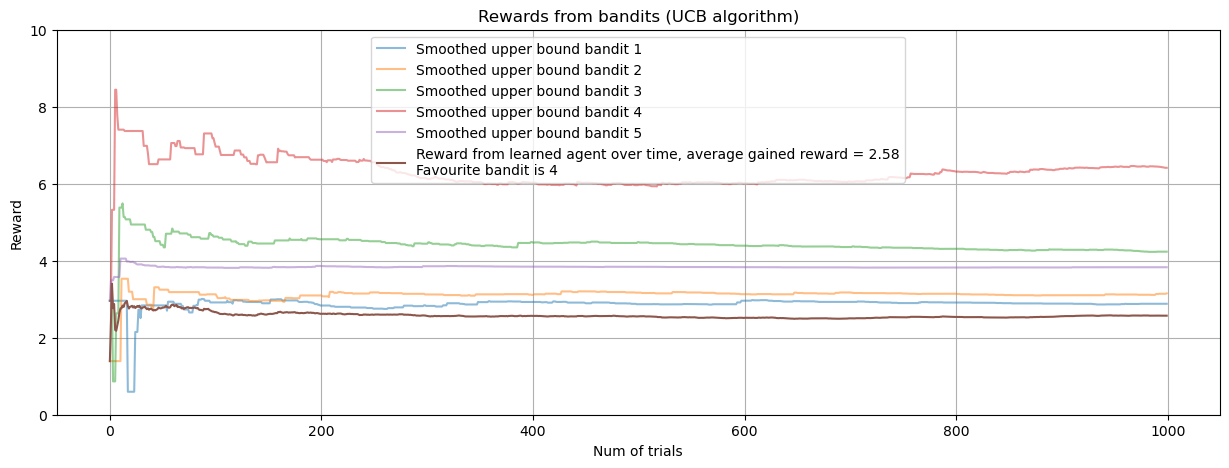

In [257]:
start_game(1_000, 1)

A priori means = [1, 1, 1, 1, 1]
A posteriori means = [1.467389012299684, 1.9410140045565576, 2.8443998943089817, 2.9449313713880203, 3.3241974736456554]


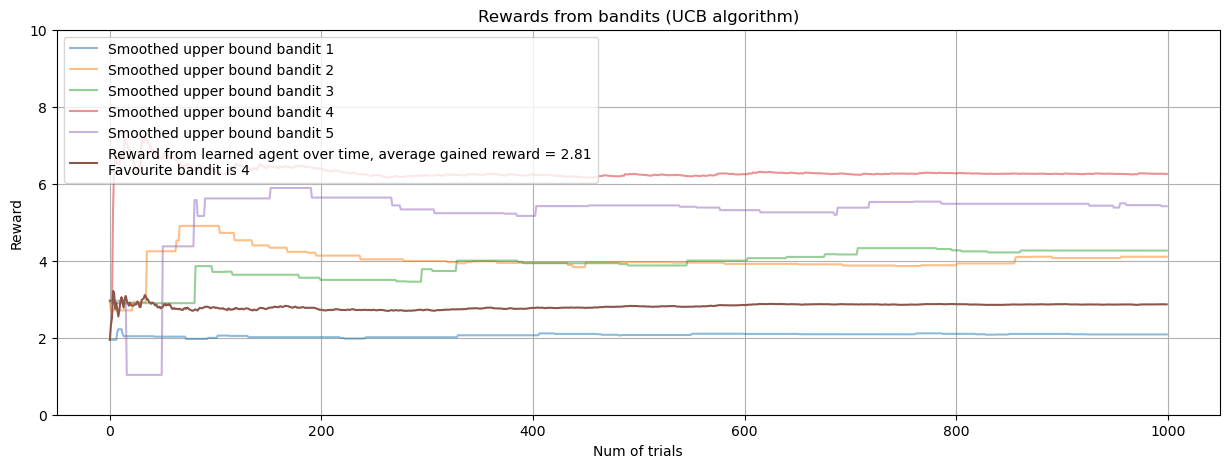

In [258]:
start_game(1_000, 0.2)

A priori means = [1, 1, 1, 1, 1]
A posteriori means = [1.555792736843472, 1.9580108907333518, 1, 1, 1]


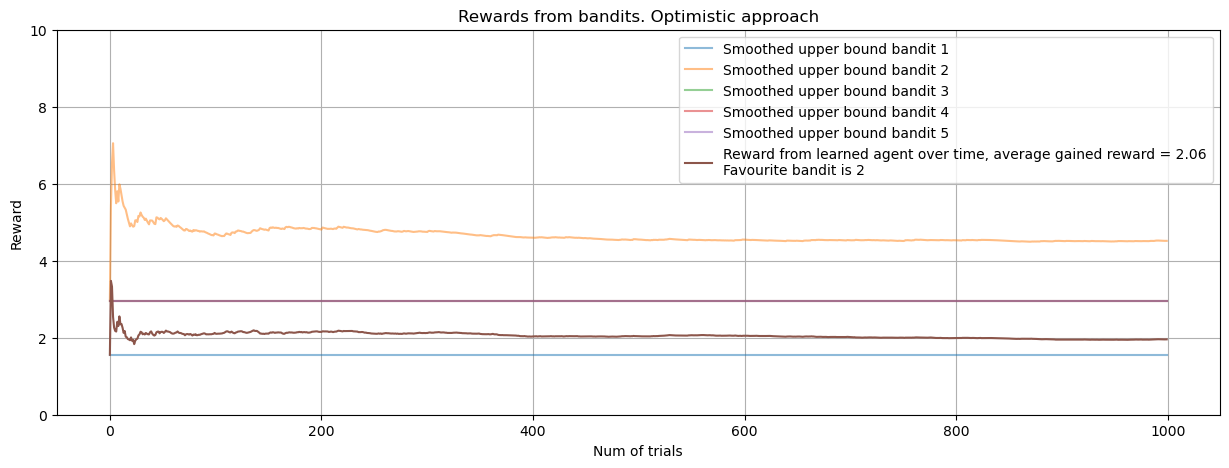

In [255]:
start_game(1_000, 0.001)